<a href="https://colab.research.google.com/github/Giocatory/ml_ai_learning/blob/main/experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений

x_train_org, y_train_org – изображения для обучения нейронной сети;

x_test_org, y_test_org – изображения для тестирования нейронной сети.

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Вывод формы данных для обучения
print(x_train_org.shape)
print(y_train_org.shape)
print(x_test_org.shape)
print(y_test_org.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)
2


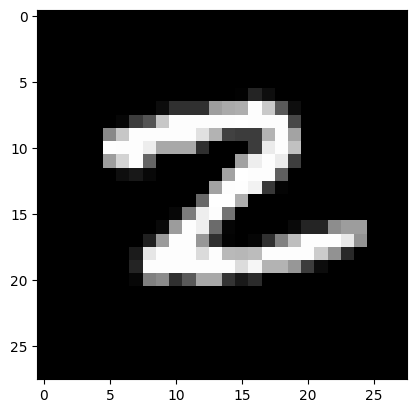

In [17]:
# Убедитесь, что ваши данные действительно представляют собой картинки с числами.
example_x_train = x_train_org[143]
print(example_x_train.shape)
print(y_train_org[143])

plt.imshow(example_x_train, cmap='gray')
plt.show()

In [18]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [19]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [20]:
# Задание константы количества распознаваемых классов

CLASS_COUNT = 10

In [21]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [22]:
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)

(60000, 10)


In [23]:
# Вывод примера одного выходного вектора
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
# Вывод формы массива меток
print(y_train_org.shape)

(60000,)


In [26]:
# Вывод метки, соответствующей 36-му элементу
print(y_train_org[143])

2


Создание нейронной сети

In [ ]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu', name='Dense_800'))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu', name='Dense_400'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax', name='Dense_10'))